<a href="https://colab.research.google.com/github/Fazloussatter/Calculating-the-On-Balance-Volume-OBV-./blob/main/Calculating_the_On_Balance_Volume_(OBV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Impooring essential libraies and modules

In [78]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [79]:
df = yf.download('AAPL')
df.head()

/tmp/ipython-input-79-2815477098.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700
2025-06-26,201.000000,202.639999,199.460007,201.429993,50799100
2025-06-27,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,207.389999,199.259995,202.009995,91912800


In [80]:

# The date information is already in the index of the DataFrame and in datetime format.
# Rename the index to 'datetime' for consistency if desired, but it's not strictly necessary for the calculation.
df.index.name = 'datetime'

# Calculate OBV using the correct and efficient vectorized operations
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

# Display the head of the DataFrame to show the calculated OBV
display(df.head())

# The rest of the code in the original cell, including the loop-based OBV calculation
# and the redundant reset_index, is removed as the vectorized approach is used.

Price,Close,High,Low,Open,Volume,OBV
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
datetime,,,,,,
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000,0.0
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700,39525700.0
2025-06-26,201.000000,202.639999,199.460007,201.429993,50799100,-11273400.0
2025-06-27,201.080002,203.220001,200.000000,201.889999,73188600,61915200.0
2025-06-30,205.169998,207.389999,199.259995,202.009995,91912800,153828000.0


#Ploting Close Price and  On-Balance Volume (OBV) of Apple

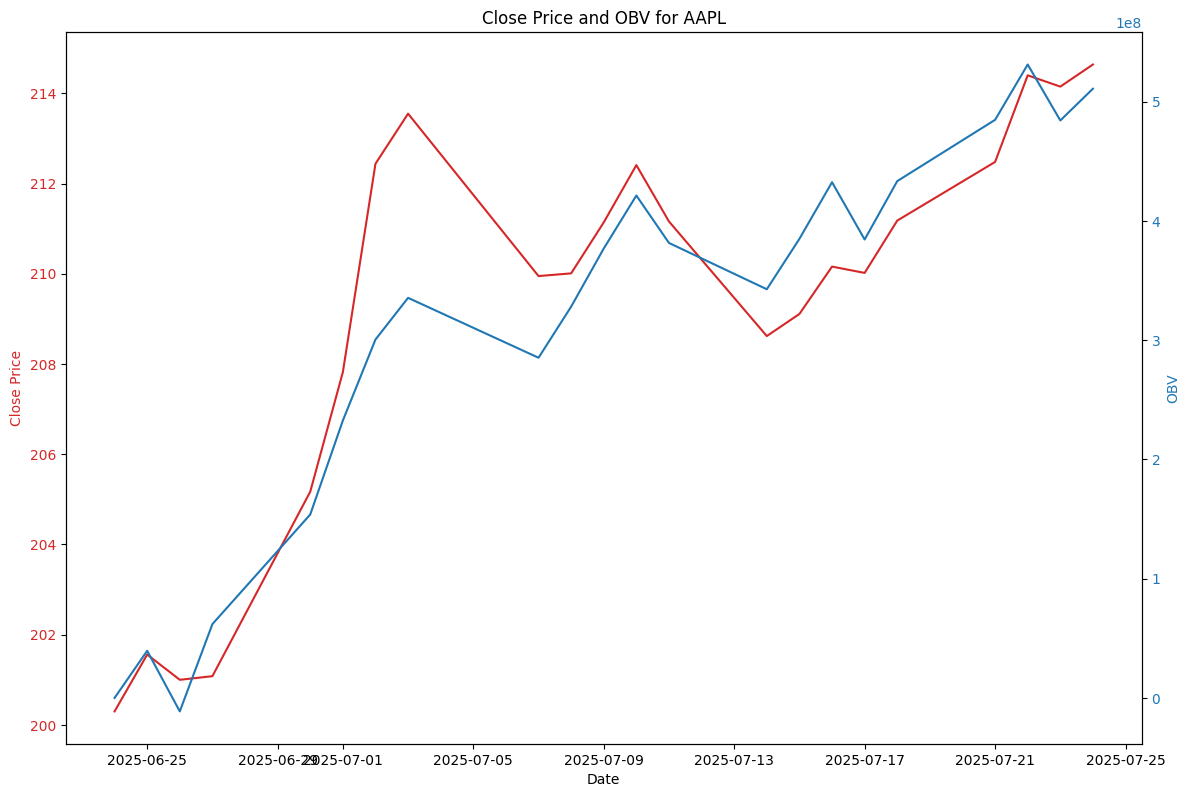

In [81]:
# Plot the Close price and OBV
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df.index, df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('OBV', color=color)
ax2.plot(df.index, df['OBV'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Close Price and OBV for AAPL')
plt.show()

#Ploting Volume and OBV

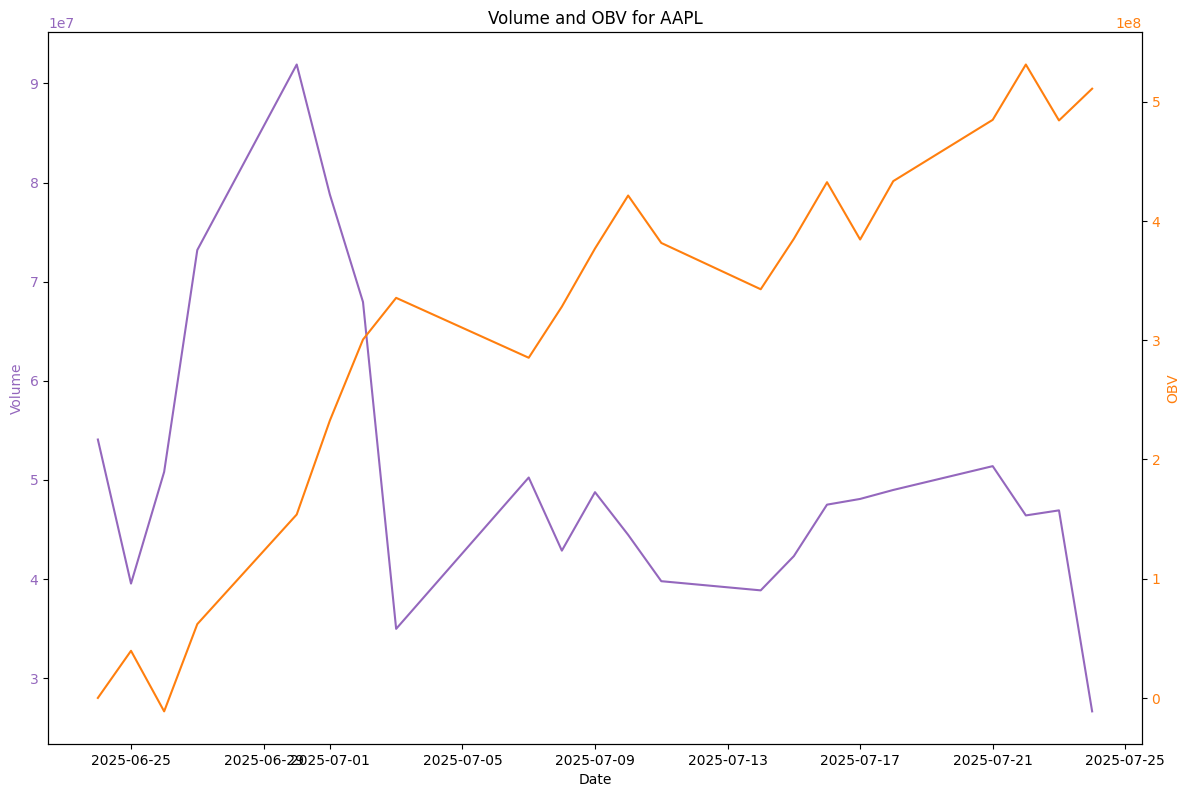

In [82]:
# Plot Volume and OBV
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:purple'
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color=color)
ax1.plot(df.index, df['Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('OBV', color=color)
ax2.plot(df.index, df['OBV'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Volume and OBV for AAPL')
plt.show()

#Ploting Close Price, Volume and OBV together.

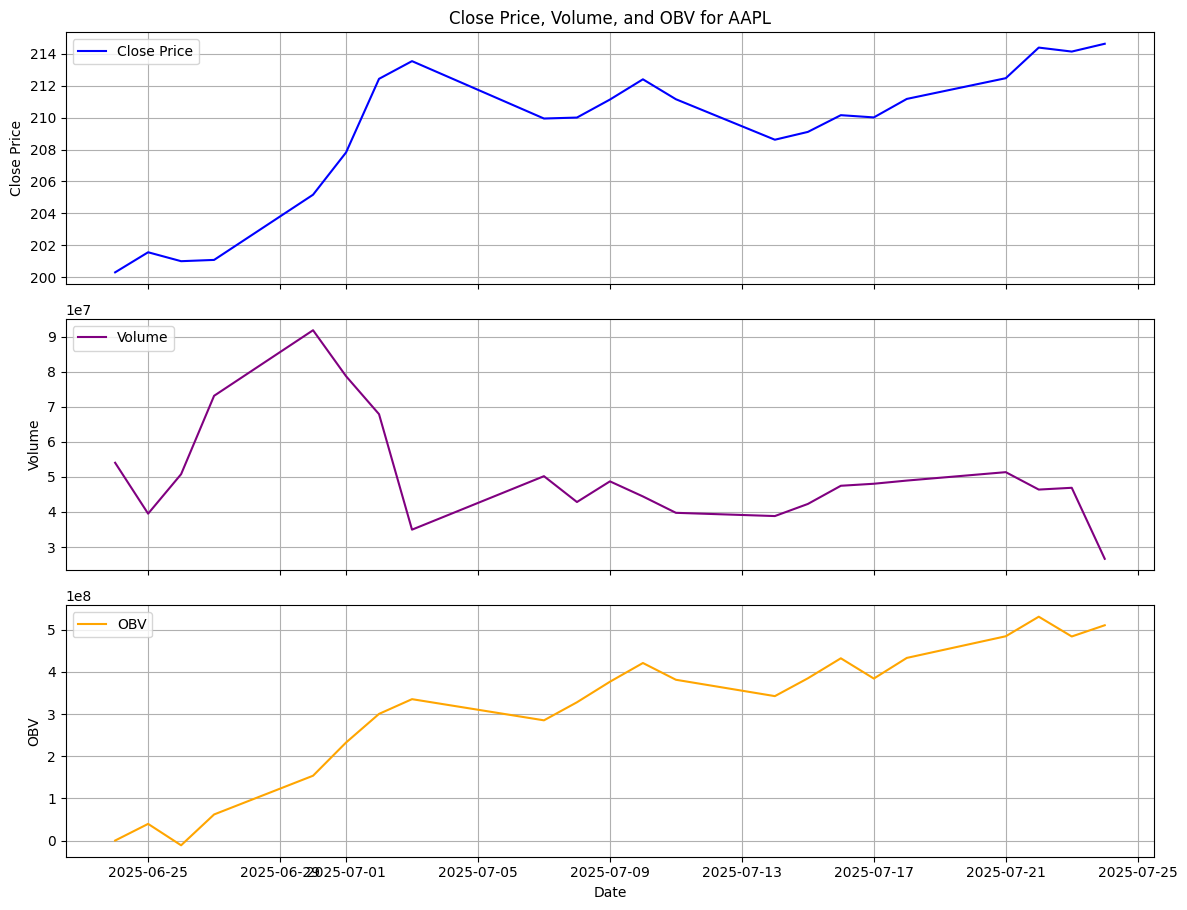

In [83]:
# Create subplots for Close Price, Volume, and OBV
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot Close Price
axes[0].plot(df.index, df['Close'], label='Close Price', color='blue')
axes[0].set_ylabel('Close Price')
axes[0].set_title('Close Price, Volume, and OBV for AAPL')
axes[0].grid(True)

# Plot Volume
axes[1].plot(df.index, df['Volume'], label='Volume', color='purple')
axes[1].set_ylabel('Volume')
axes[1].grid(True)

# Plot OBV
axes[2].plot(df.index, df['OBV'], label='OBV', color='orange')
axes[2].set_ylabel('OBV')
axes[2].set_xlabel('Date')
axes[2].grid(True)

# Add legends to each subplot
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')


fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent titles overlapping

plt.show()